In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import statistics

mpl.style.use('bmh')

In [2]:
full_info = pd.read_csv('Training DataFrame.csv', sep = ',')

In [3]:
full_info.head()

,index,client_id,district_id,age,age_group,account_id,loan_id,amount,duration,payments,...,A8,total_of_cities,A10,avg_salary,A13,A14,A16,sex_number,loan_days,district_a_id
0,0,2,1,53,50,2.0,4959,80952,24,3373.0,...,1,1,100.0,12541,0.43,167,99107,1,1822,1
1,79,25,21,59,50,19.0,4961,30276,12,2523.0,...,1,7,67.0,9104,2.07,123,2354,2,977,6
2,87,31,68,36,30,25.0,4962,30276,12,2523.0,...,2,6,57.2,9893,4.72,96,5887,1,389,5
3,102,45,20,46,40,37.0,4967,318480,60,5308.0,...,1,4,58.4,8547,3.64,120,1542,1,79,6
4,107,46,19,58,50,38.0,4968,110736,48,2307.0,...,1,4,52.7,8402,3.98,120,1099,2,257,6


In [4]:
A = full_info[full_info['status'] == 'A']
B = full_info[full_info['status'] == 'B']
C = full_info[full_info['status'] == 'C']
D = full_info[full_info['status'] == 'D']

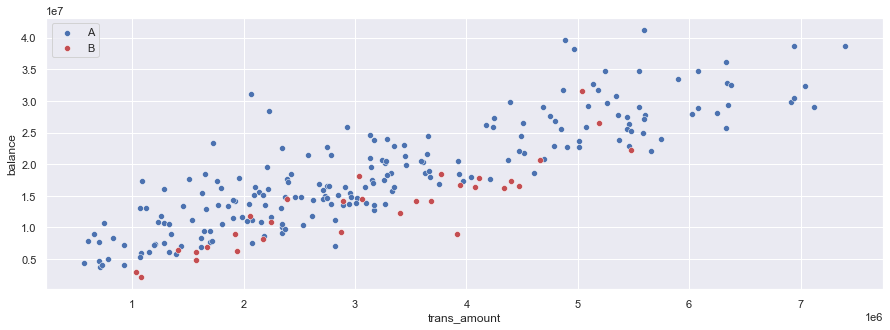

In [5]:
sns.set(rc = {'figure.figsize':(15,5)})
sns.scatterplot(data = A, x = "trans_amount", y = "balance")
sns.scatterplot(data = B, x = "trans_amount", y = "balance",color = 'r')

plt.legend(labels=["A","B"])

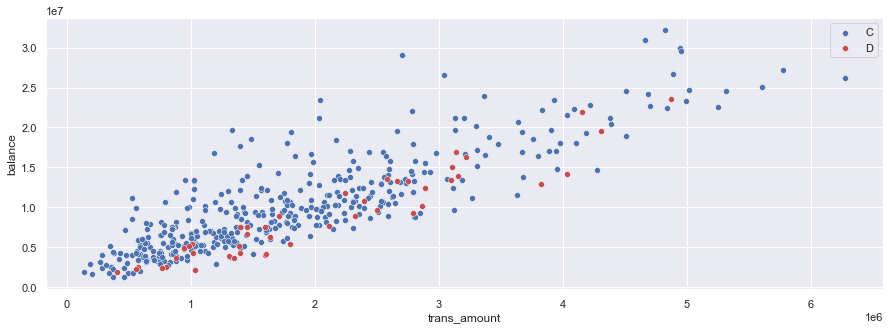

In [6]:
sns.set(rc = {'figure.figsize':(15,5)})
sns.scatterplot(data = C, x = "trans_amount", y = "balance")
sns.scatterplot(data = D, x = "trans_amount", y = "balance", color='r')

plt.legend(labels=["C","D"])

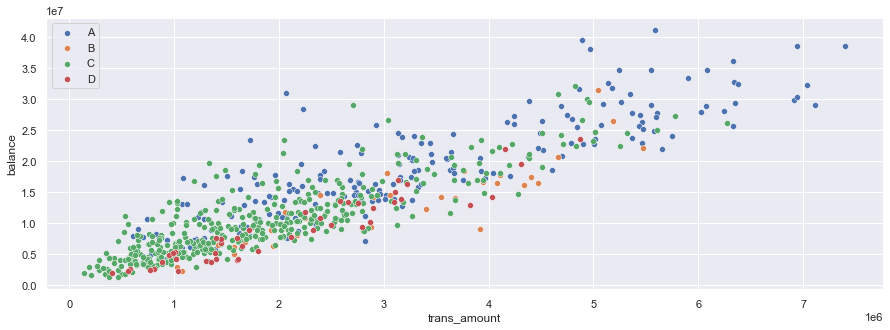

In [7]:
sns.set(rc = {'figure.figsize':(15,5)})
sns.scatterplot(data = A, x = "trans_amount", y = "balance")
sns.scatterplot(data = B, x = "trans_amount", y = "balance")
sns.scatterplot(data = C, x = "trans_amount", y = "balance")
sns.scatterplot(data = D, x = "trans_amount", y = "balance")

plt.legend(labels=["A","B","C","D"])

# Hipótesis: 

Variables a elegir: 

- [trans_amount, balance], ya que ambas tienen una relación directa una con otra y a partir de ahí se pueden definir las categorías de cada cuenta.

Elección de Algoritmo:

- Se busca obtener razones por las cuales los clientes pasan a tener una cuenta A o B. Entonces, se necesita utilizar
un algoritmo de clasificación, con el afán de tener un entrenamiento que nos divida a cada grupo de acuerdo a su
relación. Para realizarlo, se propone el algoritmo de K-Nearest-Neighbor (KNN) o un Random Forest.

Comparación de algoritmos seleccionados contra otros algoritmos:

- Se eligió el algoritmo KNN porque, a diferencia del arbol de decisiones, el KNN se calcula a través de distancias
euclideanas lo que le ayuda con la cantidad de outlyiers que tiene nuestro dataset y no se desvía como sí lo haría un
árbol de decisiones. Tampoco se eligió una función sigmoidal/logística, porque los datos tienen valores muy grandes,
aunque no se descarta por completo, porque aún se pueden normalizar dichos valores para que puedan ser clasificados
por la función

Propósito del trabajo a realizar:

- El propósito a realizar esta clasificación es para predecir si los clientes en las categorías C podrían llegar a ser
parte de aquellos en la categoría A o B. Así también, se puede hacer una clasificación propia para C y saber si los 
de la categoría D pueden llegar a transformarse propiamente en C o si tienden a ir directamente a B.

# CLASIFICACIÓN

In [8]:
#from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn import metrics

In [9]:
A['status_number'] = np.ones(len(A['status']), dtype=int)
B['status_number'] = np.zeros(len(B['status']), dtype=int)
AB = pd.concat([A,B])

C:\Users\camil\AppData\Local\Temp/ipykernel_15260/3409706720.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  A['status_number'] = np.ones(len(A['status']), dtype=int)
C:\Users\camil\AppData\Local\Temp/ipykernel_15260/3409706720.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  B['status_number'] = np.zeros(len(B['status']), dtype=int)


In [10]:
AB.sort_values(by = 'account_id')

,index,client_id,district_id,age,age_group,account_id,loan_id,amount,duration,payments,...,total_of_cities,A10,avg_salary,A13,A14,A16,sex_number,loan_days,district_a_id,status_number
0,0,2,1,53,50,2.0,4959,80952,24,3373.0,...,1,100.0,12541,0.43,167,99107,1,1822,1,1
1,79,25,21,59,50,19.0,4961,30276,12,2523.0,...,7,67.0,9104,2.07,123,2354,2,977,6,0
2,87,31,68,36,30,25.0,4962,30276,12,2523.0,...,6,57.2,9893,4.72,96,5887,1,389,5,1
5,119,78,16,54,50,67.0,4973,165960,24,6915.0,...,8,56.9,8427,1.54,107,1913,2,974,6,1
6,130,116,74,56,50,97.0,4986,102876,12,8573.0,...,1,100.0,10673,5.44,100,18347,1,509,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
670,76,13694,1,22,20,11141.0,7264,44940,12,3745.0,...,1,100.0,12541,0.43,167,99107,2,451,1,1
672,77,13803,1,51,50,11231.0,7277,89280,12,7440.0,...,1,100.0,12541,0.43,167,99107,1,434,1,1
674,240,13845,15,25,20,11265.0,7284,52788,12,4399.0,...,5,51.9,9045,3.60,124,1879,1,1934,6,1
680,656,13968,61,30,30,11359.0,7305,54024,12,4502.0,...,6,53.8,8814,5.74,107,2059,1,878,7,1


In [11]:
X = AB.loc[:,~AB.columns.isin(['status','status_number'])]
y = AB['status_number']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=1)

In [13]:
modelo_KNN = KNeighborsClassifier()
modelo_RF = RandomForestClassifier()

In [14]:
modelo_KNN.fit(X_train, y_train)
modelo_RF.fit(X_train, y_train)

RandomForestClassifier()

In [15]:
preds_KNN = modelo_KNN.predict(X_test)
preds_RF = modelo_RF.predict(X_test)

# KNN

In [16]:
preds_KNN

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1])

<Figure size 720x432 with 0 Axes>

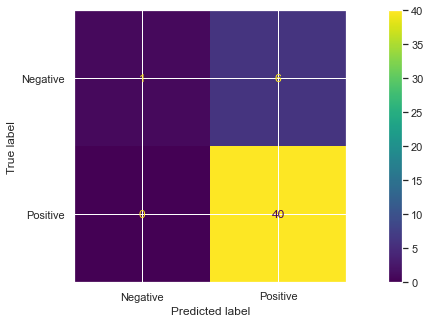

In [17]:
plt.figure(figsize=(10,6))
metrics.plot_confusion_matrix(modelo_KNN, X_test, y_test, display_labels=['Negative', 'Positive'])

In [18]:
confusion = metrics.confusion_matrix(y_test, preds_KNN)
confusion.ravel()

array([ 1,  6,  0, 40], dtype=int64)

In [19]:
accuracy = metrics.accuracy_score(y_test, preds_KNN)
accuracy 

0.8723404255319149

In [20]:
precision_positiva = metrics.precision_score(y_test, preds_KNN, pos_label=1)
precision_negativa = metrics.precision_score(y_test, preds_KNN, pos_label=0)
precision_positiva, precision_negativa 

(0.8695652173913043, 1.0)

In [21]:
recall_sensibilidad = metrics.recall_score(y_test, preds_KNN, pos_label=1)
recall_especificidad= metrics.recall_score(y_test, preds_KNN, pos_label=0)
recall_sensibilidad, recall_especificidad

(1.0, 0.14285714285714285)

In [22]:
f1_positivo = metrics.f1_score(y_test, preds_KNN, pos_label=1)
f1_negativo = metrics.f1_score(y_test, preds_KNN, pos_label=0)
f1_positivo, f1_negativo 

(0.9302325581395349, 0.25)

In [23]:
print(metrics.classification_report(y_test, preds_KNN))

              precision    recall  f1-score   support

           0       1.00      0.14      0.25         7
           1       0.87      1.00      0.93        40

    accuracy                           0.87        47
   macro avg       0.93      0.57      0.59        47
weighted avg       0.89      0.87      0.83        47



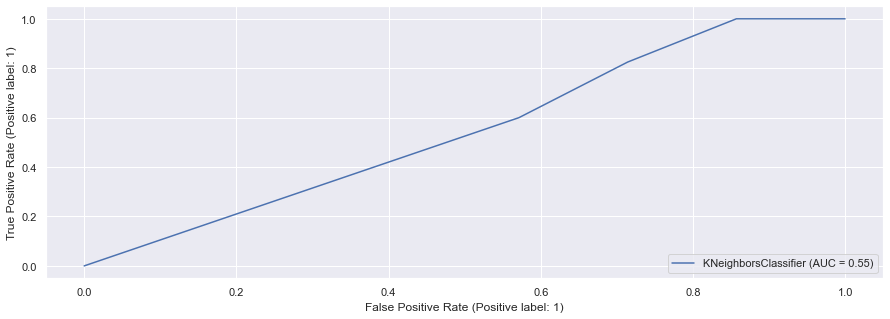

In [24]:
metrics.plot_roc_curve(modelo_KNN,X_test,y_test)

# Random Forest

In [25]:
preds_RF

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1])

<Figure size 720x432 with 0 Axes>

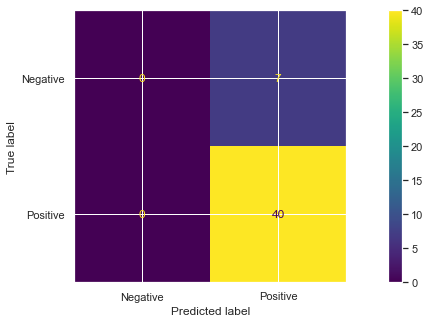

In [26]:
plt.figure(figsize=(10,6))
metrics.plot_confusion_matrix(modelo_RF, X_test, y_test, display_labels=['Negative', 'Positive'])

In [27]:
confusion = metrics.confusion_matrix(y_test, preds_RF)
confusion.ravel()

array([ 0,  7,  0, 40], dtype=int64)

In [28]:
accuracy = metrics.accuracy_score(y_test, preds_RF)
accuracy 

0.851063829787234

In [29]:
precision_positiva = metrics.precision_score(y_test, preds_RF, pos_label=1)
precision_negativa = metrics.precision_score(y_test, preds_RF, pos_label=0)
precision_positiva, precision_negativa 

C:\Users\camil\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.851063829787234, 0.0)

In [30]:
recall_sensibilidad = metrics.recall_score(y_test, preds_RF, pos_label=1)
recall_especificidad= metrics.recall_score(y_test, preds_RF, pos_label=0)
recall_sensibilidad, recall_especificidad

(1.0, 0.0)

In [31]:
f1_positivo = metrics.f1_score(y_test, preds_RF, pos_label=1)
f1_negativo = metrics.f1_score(y_test, preds_RF, pos_label=0)
f1_positivo, f1_negativo 

(0.9195402298850576, 0.0)

In [32]:
print(metrics.classification_report(y_test, preds_RF))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.85      1.00      0.92        40

    accuracy                           0.85        47
   macro avg       0.43      0.50      0.46        47
weighted avg       0.72      0.85      0.78        47



C:\Users\camil\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\camil\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\camil\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


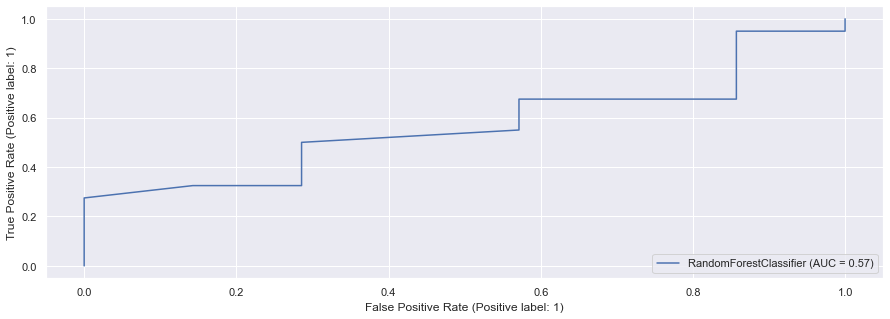

In [33]:
metrics.plot_roc_curve(modelo_RF,X_test,y_test)

# Conclusión
Obtuvimos una precisión del 85% con el KNN, quizá, debido a la cantidad de Outlyiers que hay entre cada grupo seleccionado. Pensamos, que puede resultar un mejor entrenamiento si se utiliza la tabla de datos con las transacciónes que son únicamente intereses agregados a cada cuenta, ya que se diferencían un poco más cada grupo en esta sección.

# Predicción de categoría [A,B] para categoría C:
Ahora que se tienen los modelos entrenados con los datos de las categorías A (clientes que pagaron su préstamo con éxito) y B (clientes que no terminaron de pagar su préstamo), se elige el modelo más exacto y se usa como set de testeo la tabla que incluye los datos de los clientes de la categoría C (clientes que van al corriente con el pago del préstamo) para predecir si estos se convertirán en parte de la categoría A o B en un futuro.

In [34]:
# Actualizamos al X_test igual a la tabla C
X_test = C.loc[:,~C.columns.isin(['status','status_number'])]
# Se recrea el testeo para predecir los valores de X_test
preds_KNN = modelo_KNN.predict(X_test)

In [35]:
# Se muestra el conteo de cada categoría predicha
print(['Unos (Categoría A)', np.count_nonzero(preds_KNN==1)])
print(['Ceros (Categoría B): ', np.count_nonzero(preds_KNN==0)])

['Unos (Categoría A)', 395]
['Ceros (Categoría B): ', 8]


In [36]:
def C_zeros(arr,C):
    for i,x in enumerate(arr):
        if x == 1:
            C = C.drop(i)
    return C

In [37]:
def C_ones(arr,C):
    for i,x in enumerate(arr):
        if x == 0:
            C = C.drop(i)
    return C

In [38]:
# AUX
C = full_info[full_info['status'] == 'C']

In [39]:
C = C.reset_index()
AC = C_ones(preds_KNN,C)
BC = C_zeros(preds_KNN,C)

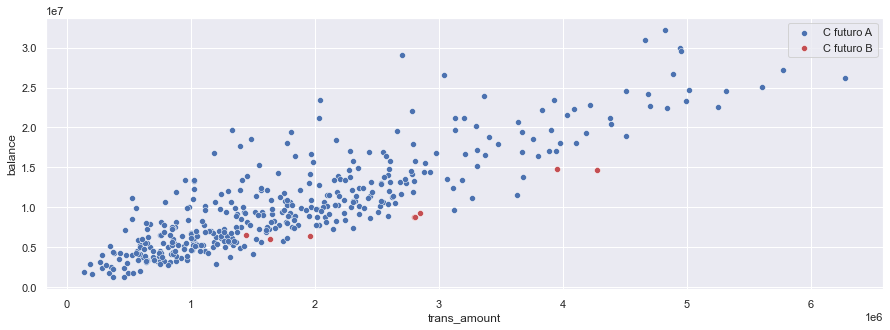

In [40]:
sns.set(rc = {'figure.figsize':(15,5)})
sns.scatterplot(data = AC, x = "trans_amount", y = "balance", color = 'b')
sns.scatterplot(data = BC, x = "trans_amount", y = "balance", color = 'r')

plt.legend(labels=["C futuro A","C futuro B"])